In [13]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df_train = pd.read_parquet("../../data/2024.08.02_muon_withnoise_ML/train.parquet")
df_test = pd.read_parquet("../../data/2024.08.02_muon_withnoise_ML/test.parquet")

df_train

,eventID,DomId_0,DomId_1,DomId_2,DomId_3,DomId_4,DomId_5,DomId_6,DomId_7,DomId_8,...,DomId_13,DomId_14,DomId_15,DomId_16,DomId_17,DomId_18,DomId_19,DomId_20,zenith_angle_out,azimuthal_angle_out
0,169510,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,416205.8125,416336.3125,416462.50000,0.0000,416722.56250,0.00000,0.00000,0.0000,2.756826,-1.907341
1,25906,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,391463.0000,391545.8125,391630.43750,391712.6875,391799.21875,391899.90625,0.00000,0.0000,2.979809,-0.603318
2,177821,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0000,0.0000,410111.78125,0.0000,410262.65625,0.00000,410458.21875,410571.1250,2.798177,1.872596
3,110987,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,467696.53125,...,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,2.535370,-2.629453
4,226452,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,387488.50000,0.00000,0.00000,...,0.0000,0.0000,388308.31250,0.0000,388487.62500,388579.12500,388670.40625,388761.5625,3.050567,0.588595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140986,191552,0.0,0.00000,0.00000,399583.00000,399613.62500,399699.59375,399787.71875,0.00000,399987.84375,...,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,2.874927,-0.007979
140987,193890,0.0,485977.12500,486011.87500,486090.46875,486235.21875,486386.31250,0.00000,0.00000,0.00000,...,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,2.479378,-2.881440
140988,220554,0.0,0.00000,437744.12500,437815.28125,437912.50000,438071.43750,0.00000,438293.00000,0.00000,...,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,2.643049,-2.120667
140989,154504,393673.5,393765.25000,393845.40625,393939.18750,0.00000,394158.09375,0.00000,394400.21875,394492.18750,...,395076.2500,0.0000,395322.65625,0.0000,0.00000,0.00000,0.00000,0.0000,2.932255,0.370680


In [15]:
df_train['zenith_angle_out'] = np.degrees(df_train['zenith_angle_out'])
df_test['zenith_angle_out'] = np.degrees(df_test['zenith_angle_out'])

# Extract features and target variable
X_train = df_train.filter(regex='DomId_')
y_train = df_train['zenith_angle_out']

X_test = df_test.filter(regex='DomId_')
y_test = df_test['zenith_angle_out']

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'eta': 0.1,
    'verbosity': 1
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")

Training RMSE: 1.3917728454457508
Testing RMSE: 1.3911379546644325


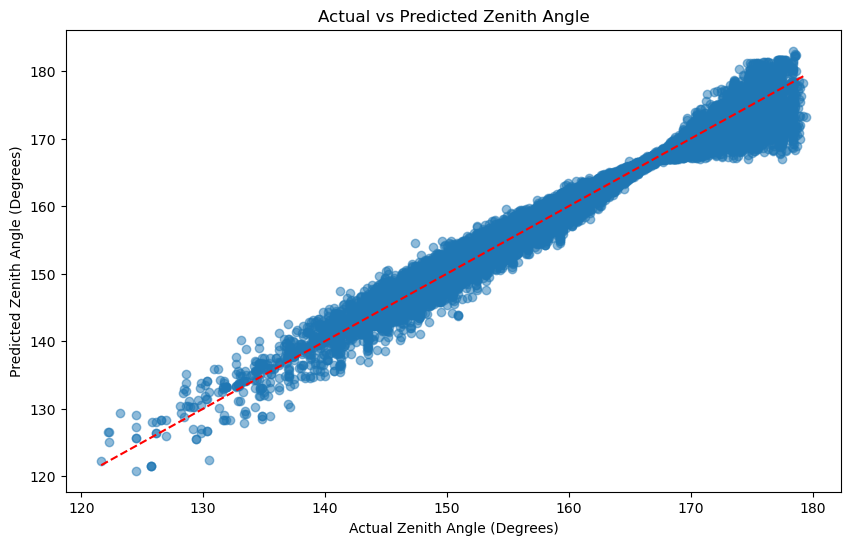

In [16]:
# Plot a scatter plot of predicted vs actual values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Zenith Angle (Degrees)')
plt.ylabel('Predicted Zenith Angle (Degrees)')
plt.title('Actual vs Predicted Zenith Angle')
plt.show()

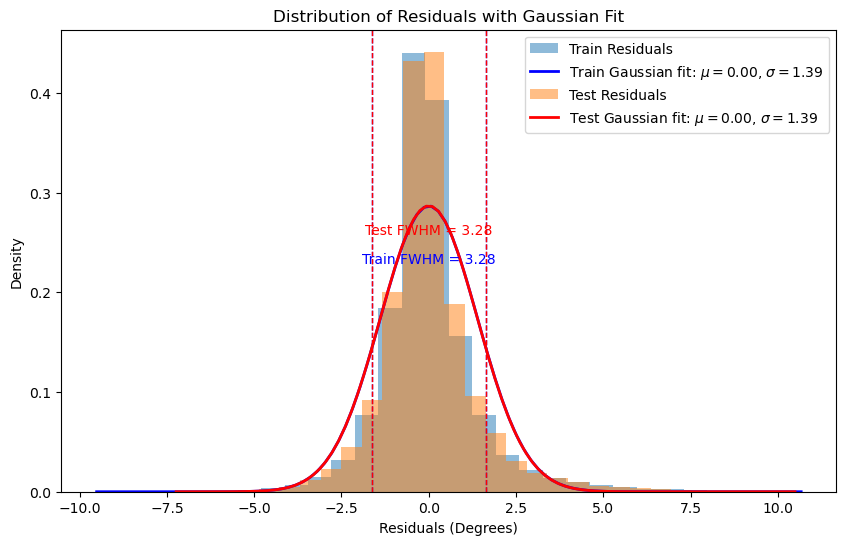

In [32]:
# Plot a histogram of the residuals (differences between actual and predicted values) and fit a Gaussian
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Fit Gaussian to the residuals
mu_train, std_train = norm.fit(train_residuals)
mu_test, std_test = norm.fit(test_residuals)

# Calculate FWHM
fwhm_train = 2 * np.sqrt(2 * np.log(2)) * std_train
fwhm_test = 2 * np.sqrt(2 * np.log(2)) * std_test

plt.figure(figsize=(10, 6))
# Plot training residuals
plt.hist(train_residuals, bins=30, alpha=0.5, density=True, label='Train Residuals')
x_train = np.linspace(train_residuals.min(), train_residuals.max(), 100)
p_train = norm.pdf(x_train, mu_train, std_train)
plt.plot(x_train, p_train, 'b', linewidth=2, label=f'Train Gaussian fit: $\mu={mu_train:.2f}$, $\sigma={std_train:.2f}$')
plt.axvline(mu_train - fwhm_train / 2, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(mu_train + fwhm_train / 2, color='blue', linestyle='dashed', linewidth=1)
plt.text(mu_train, max(p_train)*0.8, f'Train FWHM = {fwhm_train:.2f}', color='blue', ha='center')

# Plot testing residuals
plt.hist(test_residuals, bins=30, alpha=0.5, density=True, label='Test Residuals')
x_test = np.linspace(test_residuals.min(), test_residuals.max(), 100)
p_test = norm.pdf(x_test, mu_test, std_test)
plt.plot(x_test, p_test, 'r', linewidth=2, label=f'Test Gaussian fit: $\mu={mu_test:.2f}$, $\sigma={std_test:.2f}$')
plt.axvline(mu_test - fwhm_test / 2, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mu_test + fwhm_test / 2, color='red', linestyle='dashed', linewidth=1)
plt.text(mu_test, max(p_test)*0.9, f'Test FWHM = {fwhm_test:.2f}', color='red', ha='center')


plt.xlabel('Residuals (Degrees)')
plt.ylabel('Density')
plt.title('Distribution of Residuals with Gaussian Fit')
plt.legend()
plt.show()